In [1]:
import torch
from segment_anything import sam_model_registry

#DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')
MODEL_TYPE = "vit_b"

sam = sam_model_registry[MODEL_TYPE](checkpoint="checkpoints/sam_vit_b.pth")
sam.to(DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


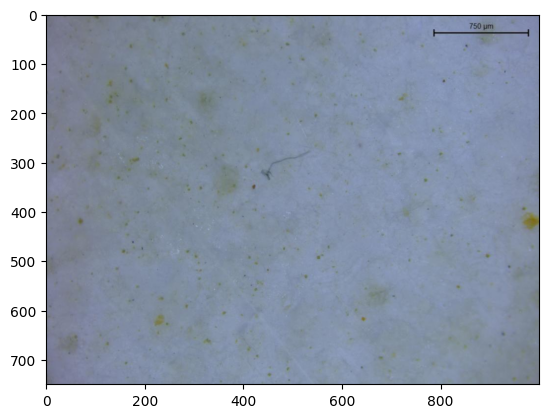

In [2]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("fibras_low_res_all/1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
from segment_anything import SamAutomaticMaskGenerator

#image_rgb = image_rgb.to(DEVICE)
mask_generator = SamAutomaticMaskGenerator(model=sam)
mask = mask_generator.generate(image)

In [4]:
import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0],m.shape[1],3))
        color_mask = np.random.random((1,3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.8)))

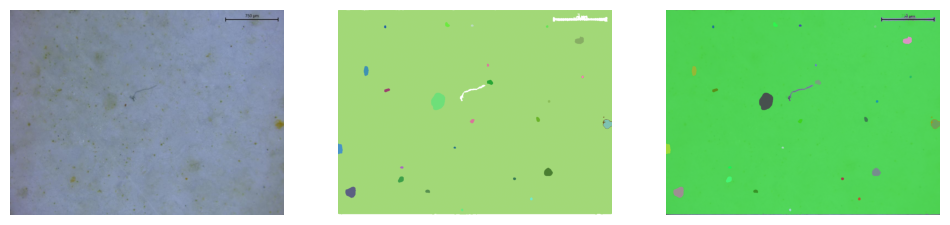

In [5]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(image)
axs[2].imshow(image) 
show_anns(mask,axs[1])
show_anns(mask,axs[2])
axs[0].axis('off')
axs[1].axis('off')    
axs[2].axis('off')    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask0
[0, 0, 999, 747]
[0, 999, 0, 747]


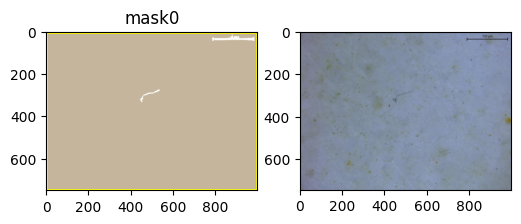

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask1
[340, 305, 50, 62]
[340, 390, 305, 367]


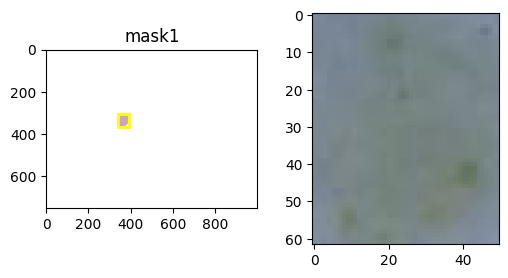

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask2
[968, 403, 31, 32]
[968, 999, 403, 435]


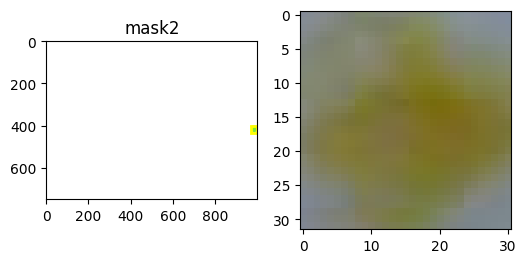

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask3
[27, 647, 37, 40]
[27, 64, 647, 687]


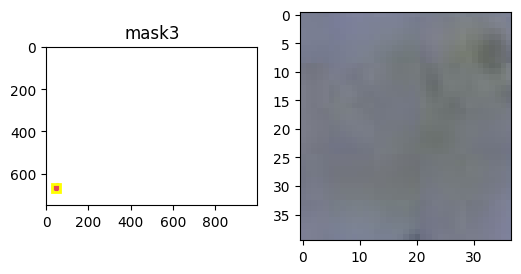

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask4
[752, 578, 31, 29]
[752, 783, 578, 607]


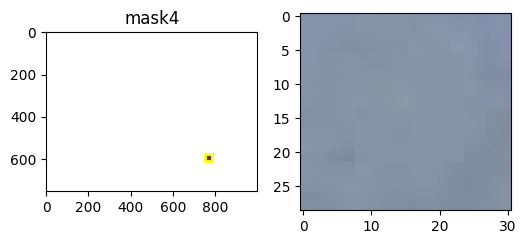

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask5
[966, 392, 33, 44]
[966, 999, 392, 436]


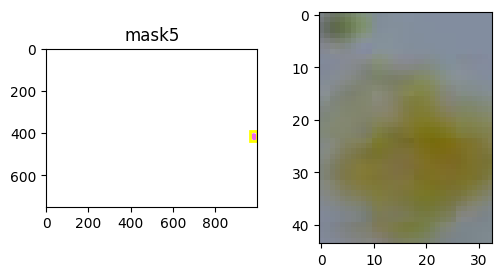

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask6
[219, 609, 20, 22]
[219, 239, 609, 631]


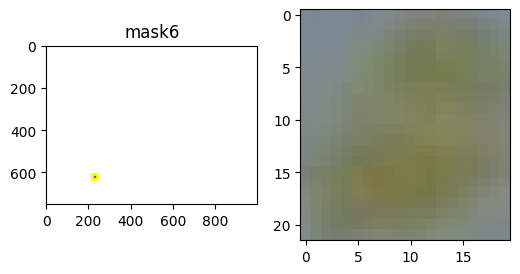

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask7
[169, 289, 20, 13]
[169, 189, 289, 302]


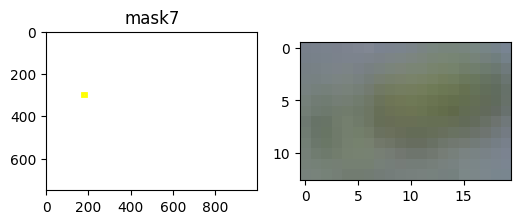

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask8
[639, 613, 10, 9]
[639, 649, 613, 622]


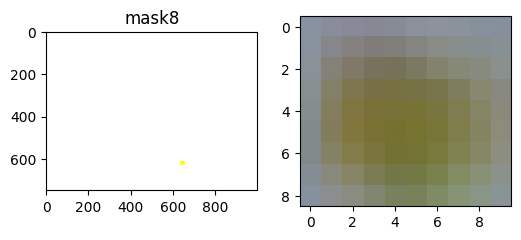

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask9
[864, 100, 32, 27]
[864, 896, 100, 127]


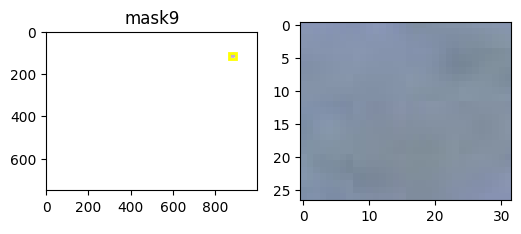

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask10
[723, 393, 13, 17]
[723, 736, 393, 410]


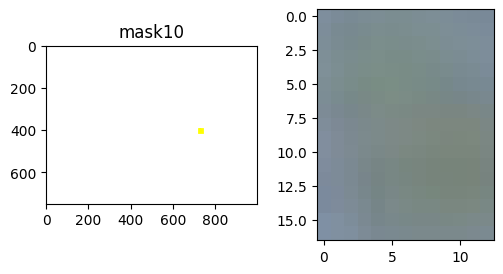

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask11
[544, 199, 7, 10]
[544, 551, 199, 209]


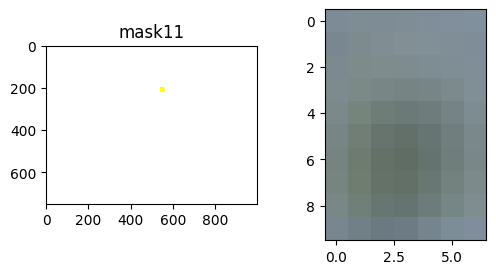

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask12
[318, 657, 17, 12]
[318, 335, 657, 669]


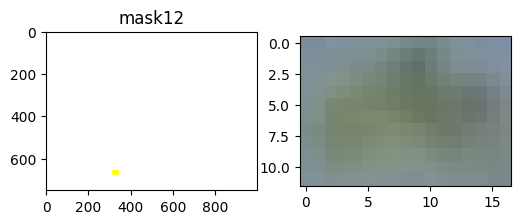

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask13
[544, 200, 6, 8]
[544, 550, 200, 208]


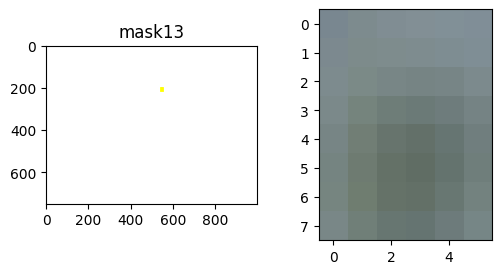

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask14
[766, 332, 8, 8]
[766, 774, 332, 340]


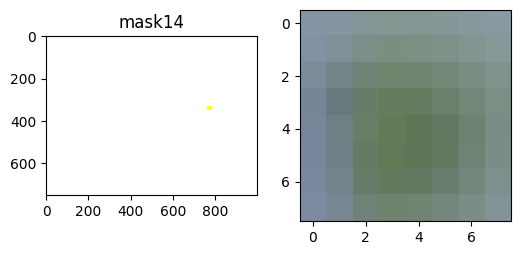

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask15
[226, 573, 12, 7]
[226, 238, 573, 580]


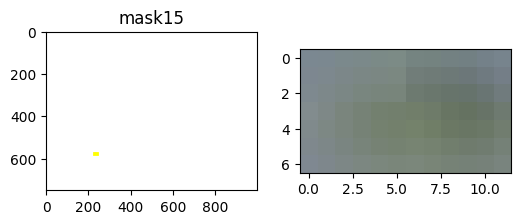

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask16
[168, 60, 7, 9]
[168, 175, 60, 69]


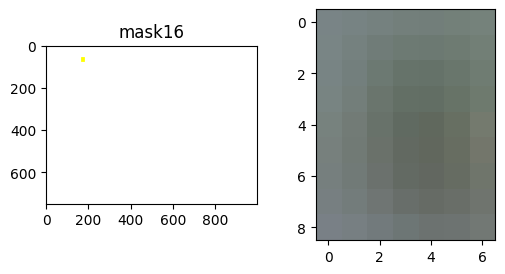

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask17
[422, 501, 8, 6]
[422, 430, 501, 507]


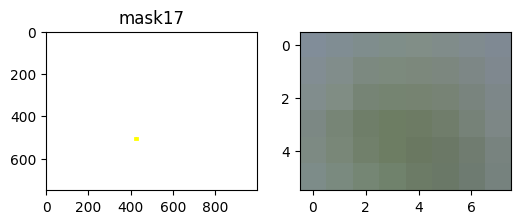

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask18
[701, 686, 8, 10]
[701, 709, 686, 696]


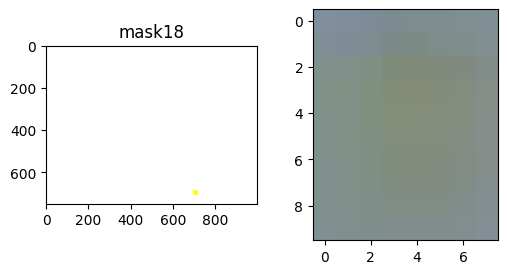

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask19
[485, 56, 9, 7]
[485, 494, 56, 63]


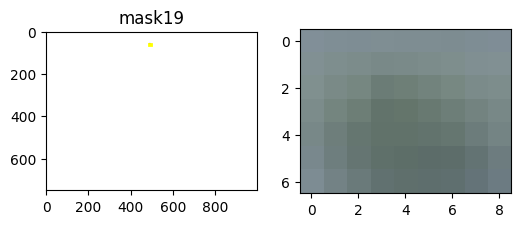

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask20
[94, 208, 17, 35]
[94, 111, 208, 243]


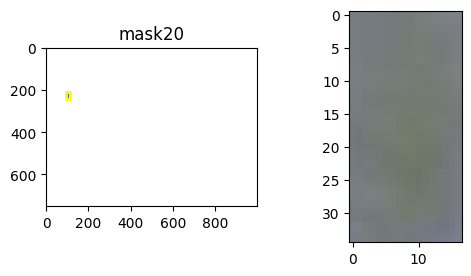

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask21
[0, 490, 16, 37]
[0, 16, 490, 527]


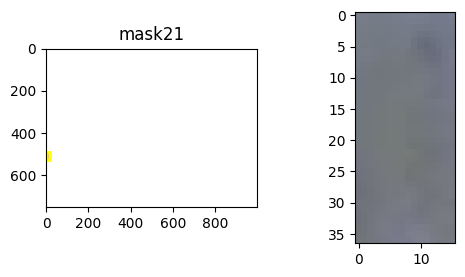

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask22
[391, 48, 16, 17]
[391, 407, 48, 65]


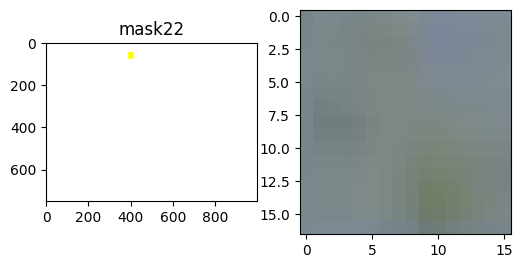

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask23
[449, 727, 7, 9]
[449, 456, 727, 736]


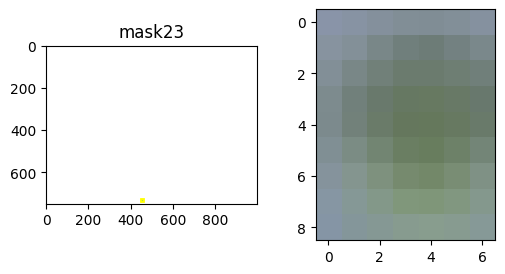

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask24
[889, 243, 6, 8]
[889, 895, 243, 251]


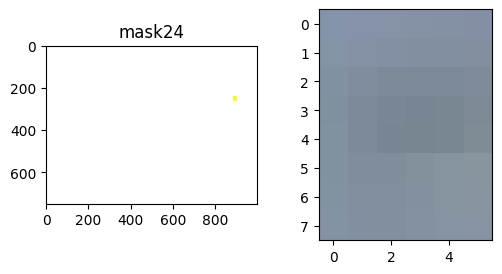

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask25
[759, 59, 8, 8]
[759, 767, 59, 67]


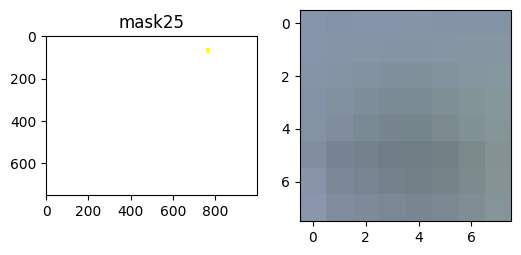

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask26
[890, 244, 5, 6]
[890, 895, 244, 250]


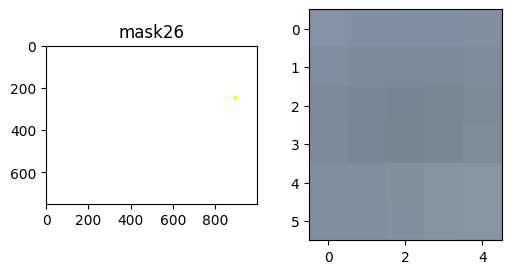

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask27
[481, 401, 16, 14]
[481, 497, 401, 415]


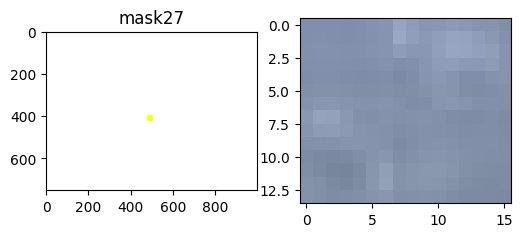

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask28
[544, 258, 21, 17]
[544, 565, 258, 275]


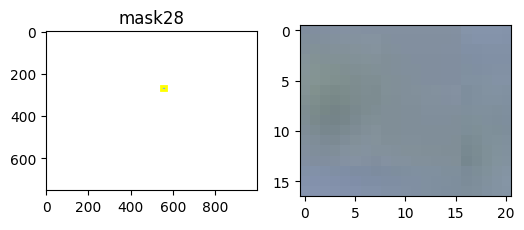

In [12]:
from matplotlib import patches

bgw=np.ones(image.shape)*255
for i in range(len(mask)):
    fig, ax = plt.subplots(1,2,figsize=(6,3))
    ax[0].imshow(bgw)
    masksi=mask[i]
    box0=masksi['bbox']
    xc,yc,w,h = box0
    x0=xc
    y0=yc
    x1=xc+w
    y1=yc+h
    print(f'mask{i}')
    print(box0)
    print([x0,x1,y0,y1])
    rect = patches.Rectangle( (xc,yc),w,h, linewidth=2, edgecolor='yellow', fill=False)
    
    boximage=image[y0:y1,x0:x1,:]
    cv2.imwrite(str(i).zfill(3)+'.png', boximage)
    
    show_anns([masksi],ax[0])
    ax[0].add_patch(rect)
    ax[1].imshow(boximage)
    ax[0].set_title(f'mask{i}') 
    plt.show()     